#                  Project--- Sentiment Analysis on Twitter Data


Analyze and visualize sentiment patterns on social media(Twitter) data to understand public opinion and attitudes towards specific topics or brands

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load Data

In [33]:
df_train = pd.read_csv('twitter_training.csv')
df_val = pd.read_csv('twitter_validation.csv')
# concatenate data
df = pd.concat([df_train, df_val], ignore_index=False)
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,4891.0,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,NaN,NaN,NaN,NaN,4359.0,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,NaN,NaN,NaN,NaN,2652.0,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,NaN,NaN,NaN,NaN,8069.0,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75680 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                              --------------  -----  
 0   2401                                                                                                                                                                                                                                                74681 non-null  float64
 1   Borderlands                                                           

 Remove unnecessary columns & Rename them

In [35]:
# Remove unnecessary columns
columns_to_drop = ['2401', '3364', 'Facebook', 'Irrelevant',
                   'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']

df = df.drop(columns_to_drop, axis=1)

# Rename columns
df = df.rename(columns={'im getting on borderlands and i will murder you all ,': 'Tweet', 
                        'Positive': 'Sentiment', 'Borderlands':"Brand"})
df.head()


,Brand,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75680 entries, 0 to 998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      74681 non-null  object
 1   Sentiment  74681 non-null  object
 2   Tweet      73995 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [37]:
# check missing values
print(df.isna().sum())

Brand         999
Sentiment     999
Tweet        1685
dtype: int64


In [38]:
# remove missing values
df.dropna(inplace=True)
# check missing values
df.isnull().sum()   

Brand        0
Sentiment    0
Tweet        0
dtype: int64

In [39]:
# check duplicate values
df.duplicated().sum()

3038

In [40]:
# remove duplicate values 
remove_duplicates = df.drop_duplicates()
df = remove_duplicates
# check duplicate values
df.duplicated().sum()

0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70957 entries, 0 to 74680
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      70957 non-null  object
 1   Sentiment  70957 non-null  object
 2   Tweet      70957 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


# Visualization

# Distribution of Branches

In [42]:
df['Brand'].nunique()

32

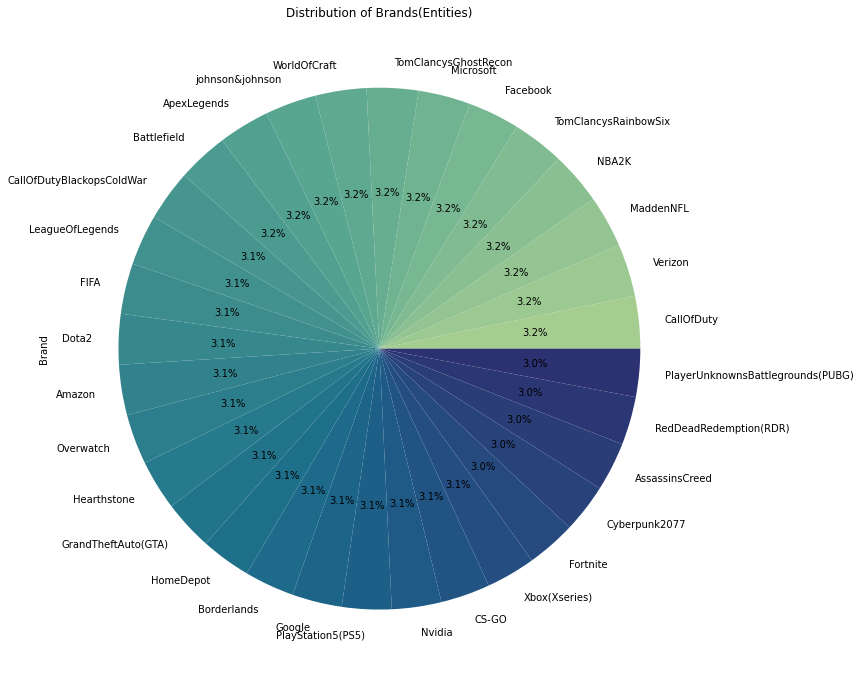

In [43]:
df['Brand'].value_counts().plot(kind='pie',autopct='%1.1f%%',cmap='crest',figsize=(12, 12))
plt.title('Distribution of Brands(Entities)')
plt.show()

* we can see from the above plot the entities of the tweets are mostly equals


# Sentiment Distribution

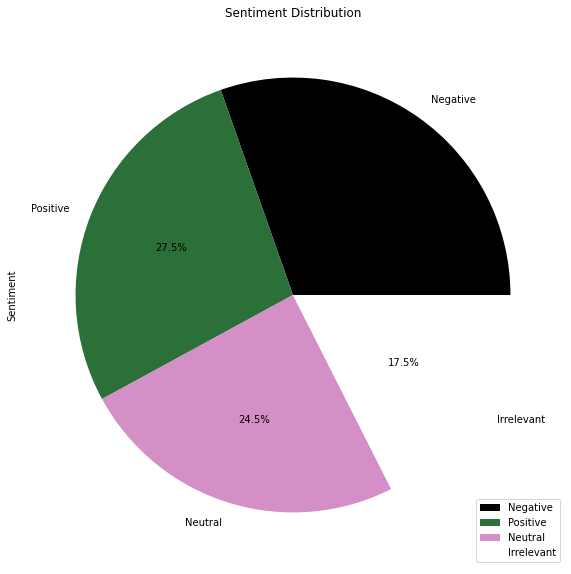

In [44]:
df['Sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%',cmap='cubehelix',legend=True,figsize=(10,10))
plt.title('Sentiment Distribution')
plt.show()

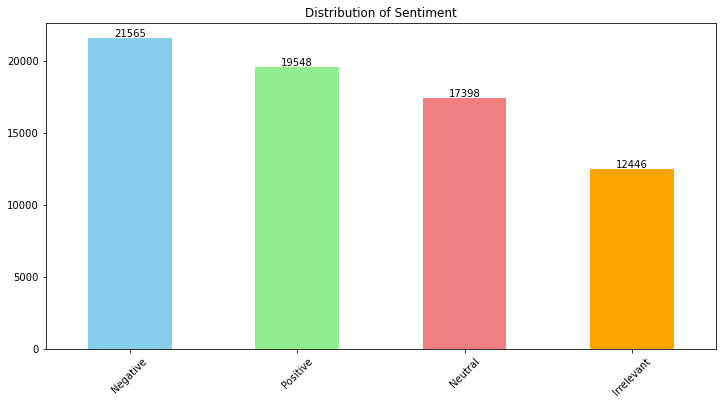

In [45]:
y= df['Sentiment'].value_counts()
x= df['Sentiment'].unique()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center',va='bottom')
    
plt.figure(figsize=(12,6))
df['Sentiment'].value_counts().plot(kind='bar',color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Distribution of Sentiment')                                                               
addlabels(x, y)
plt.xticks(rotation=45)
plt.show()

* At the above figure we can see the number of the negative reactions are above to 20000 which is more than 30%
* The min number of the reactions are the number of the irrelevant reactions are less than 15000 ,17.5%

# Sentiment Distribution on Brands

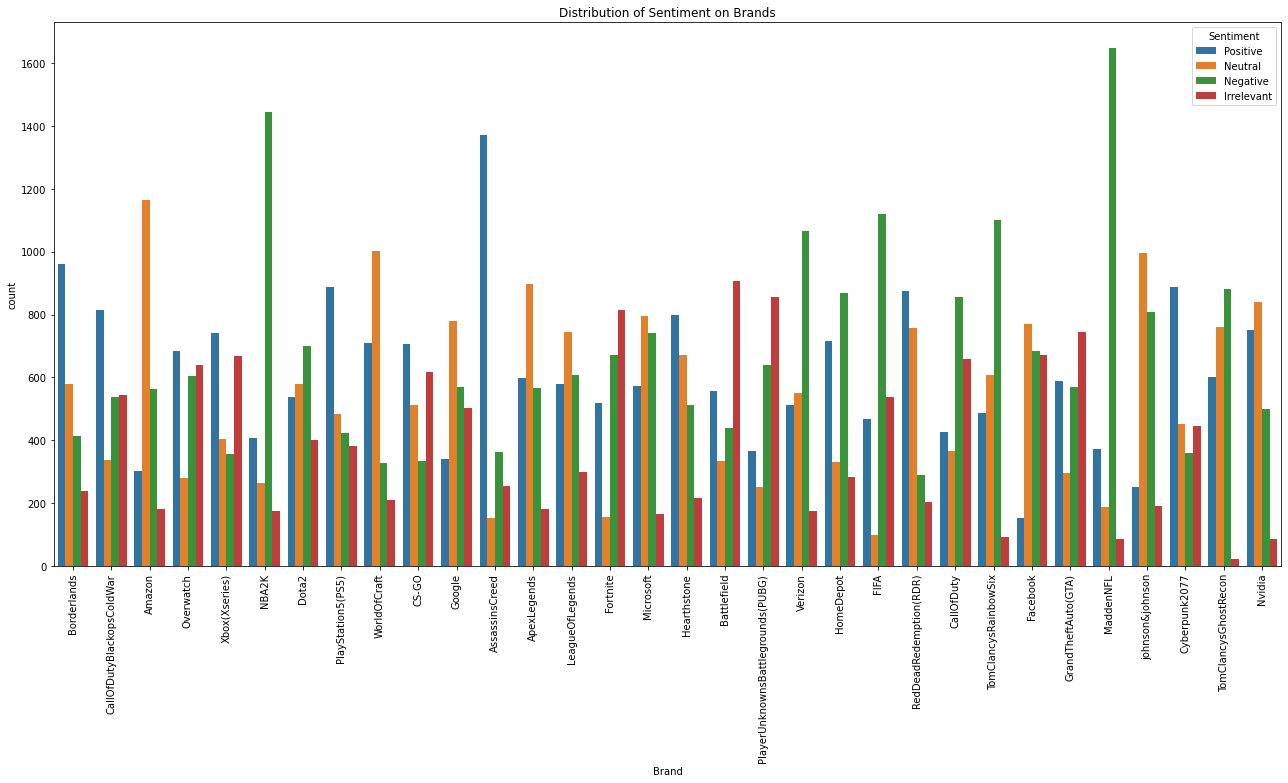

In [46]:
plt.figure(figsize=(22,10))
sns.countplot(df['Brand'],data= df,hue ='Sentiment')
plt.title('Distribution of Sentiment on Brands') 
plt.xticks(rotation= 90)
plt.show()

* From the above figure the highest negative reactions in the MaddenNFL entity.
* The highest irrelevant reactions in the Battlefield entity.
* The highest neutral reactions in the Amazon entity.
* The highest positive reactions in the AssassinsCreed entity.

# Text Length Analysis

In [179]:
df['tweet_length']= df['Tweet'].apply(len)

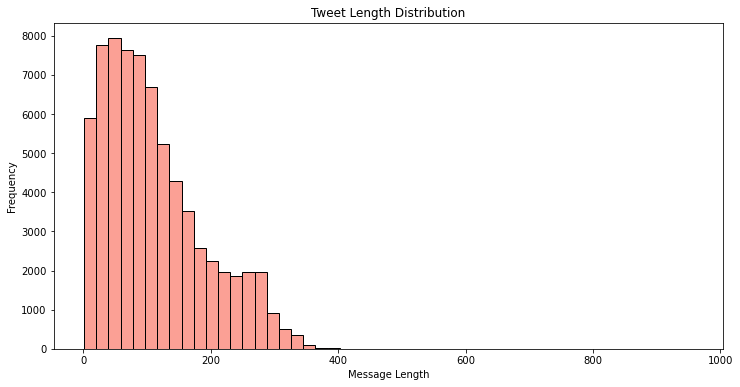

In [180]:
plt.figure(figsize=(12,6))
sns.histplot(df['tweet_length'], bins=50,color='salmon')
plt.title('Tweet Length Distribution')
plt.ylabel('Frequency')
plt.xlabel('Message Length')


plt.show()

* Peak at Short Texts: The histogram shows that there is a peak in the frequency of short texts. Many tweets are relatively brief in terms of character count. Longer Texts Exist: While short texts are prevalent, there is still a range of longer texts present in the dataset, as evidenced by the right tail of the distribution.

# Sentiment analysis on Text Length

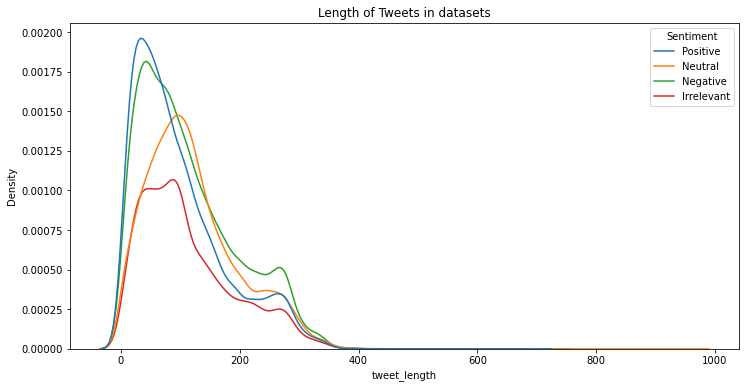

In [181]:
plt.figure(figsize=(12,6))
sns.kdeplot(x='tweet_length',data=df,hue='Sentiment')
plt.title("Length of Tweets in datasets")
plt.show()

* Positive and Negative sentiments peaks seen in the short text while neutral sentiment seen in little longer texts and irrelevent went short to little texts.

# Word Frequency Analysis

In [47]:
import re #Regular expressions
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaneela\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
# word frequency analysis
import re
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
stopwords_list[:5]


['i', 'me', 'my', 'myself', 'we']

In [49]:
word_counts = {'Positive': [],
                'Neutral': [],
                'Irrelevant': [],
                'Negative': []}

pattern = re.compile('[^\w ]')
for text, t in zip(df['Tweet'], df['Sentiment']):
    text = re.sub(pattern, '', text).lower().split()
    text = [word for word in text if word not in stopwords_list]
    word_counts[t].extend(text)
               

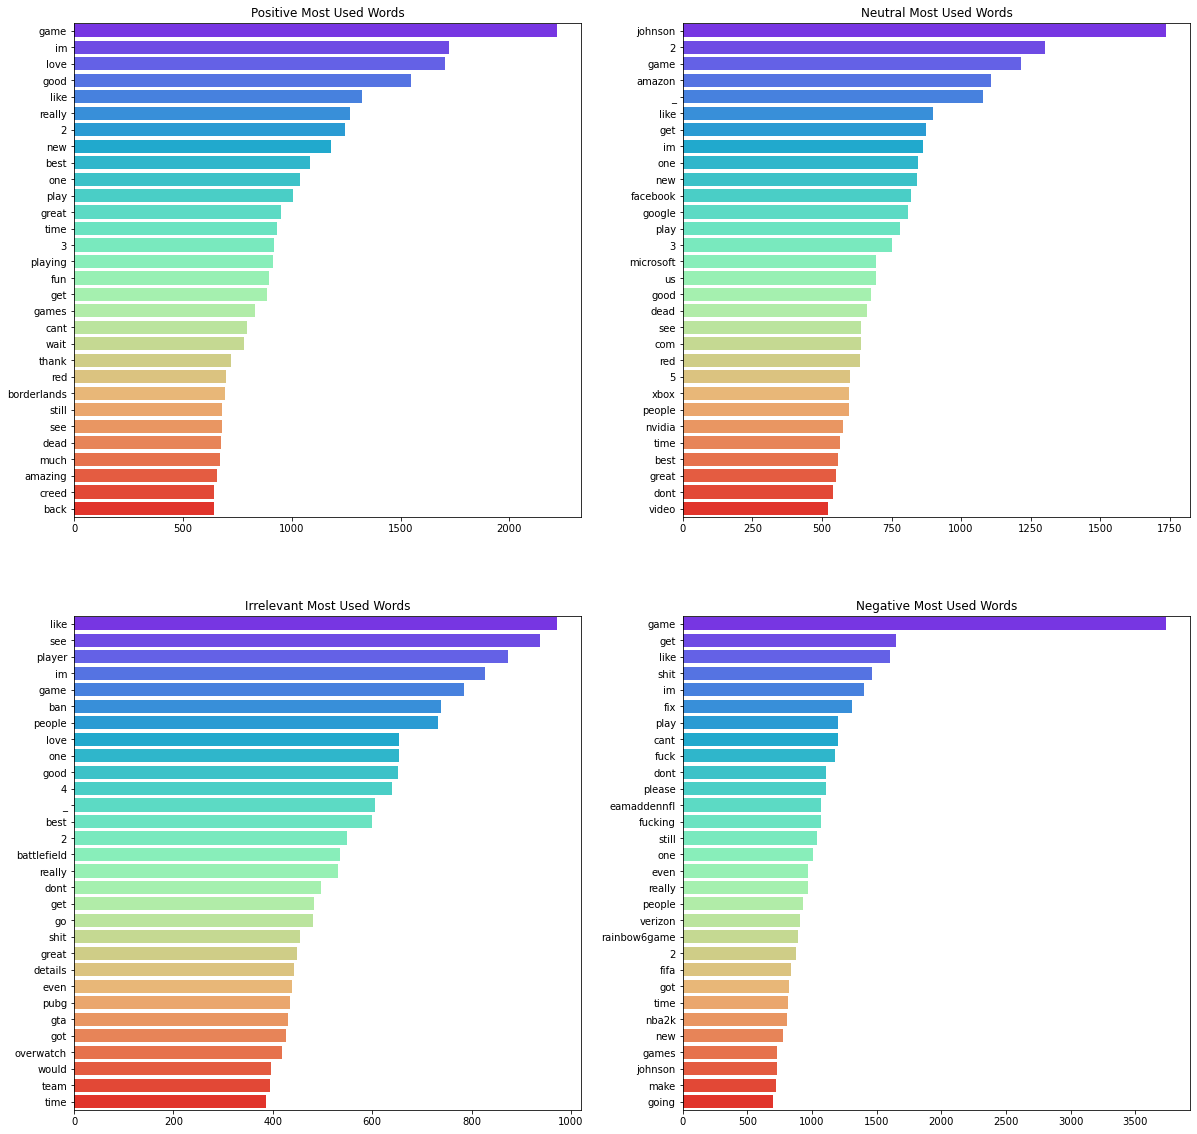

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(20,20))
for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:30]
    sns.barplot(x=bar_info.values, y=bar_info.index, ax=axis,palette='rainbow')
    axis.set_title(f'{target} Most Used Words')
plt.show()

THANK YOU